In [12]:
import pandas as pd
from pathlib import Path

In [13]:

file_path = Path("main_dataset_with_territory_id.csv")
df = pd.read_csv(file_path)
df.head()

,year,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,hbA1c_High,territory_id
0,2020,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0,NaN,1
1,2015,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0,NaN,1
2,2015,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0,NaN,1
3,2015,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0,NaN,1
4,2016,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0,Diabetes,1


In [14]:
file_path2 = Path("territories.csv")
df2 = pd.read_csv(file_path2)
df2.head()

,location,territory_id
0,Alabama,1
1,Alaska,2
2,Arizona,3
3,Arkansas,4
4,California,5


In [15]:
# Average BMI by gender
print(df.groupby('gender')['bmi'].mean())

gender
Female    27.449300
Male      27.139073
Other     27.379444
Name: bmi, dtype: float64


In [16]:
##Correlation Analysis
# Filter only numeric columns
numeric_df = df.select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
correlation_matrix

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,territory_id
year,1.000000,-0.003303,-0.004282,-0.007287,0.010585,0.004175,-0.003139,-0.003787,0.001834,-0.001861,-0.000460,0.002985,-0.003444,-0.062230
age,-0.003303,1.000000,-0.002249,0.003934,0.003746,0.001929,-0.007338,0.251194,0.233375,0.337426,0.101398,0.110690,0.258032,0.005382
race:AfricanAmerican,-0.004282,-0.002249,1.000000,-0.251825,-0.250770,-0.250880,-0.251754,-0.001207,-0.000668,-0.001249,0.001339,0.002268,0.004372,-0.003006
race:Asian,-0.007287,0.003934,-0.251825,1.000000,-0.249105,-0.249215,-0.250083,0.004015,0.006194,0.005240,-0.000463,0.000222,0.003780,0.000944
race:Caucasian,0.010585,0.003746,-0.250770,-0.249105,1.000000,-0.248171,-0.249035,0.000505,-0.001224,-0.002114,-0.004086,0.004140,-0.001747,-0.001996
race:Hispanic,0.004175,0.001929,-0.250880,-0.249215,-0.248171,1.000000,-0.249145,0.001357,-0.000780,0.002363,0.000465,-0.002712,-0.001314,0.004943
race:Other,-0.003139,-0.007338,-0.251754,-0.250083,-0.249035,-0.249145,1.000000,-0.004661,-0.003524,-0.004236,0.002730,-0.003924,-0.005116,-0.000867
hypertension,-0.003787,0.251194,-0.001207,0.004015,0.000505,0.001357,-0.004661,1.000000,0.121255,0.147667,0.080942,0.084424,0.197814,0.005728
heart_disease,0.001834,0.233375,-0.000668,0.006194,-0.001224,-0.000780,-0.003524,0.121255,1.000000,0.061198,0.067592,0.070063,0.171720,0.004392
bmi,-0.001861,0.337426,-0.001249,0.005240,-0.002114,0.002363,-0.004236,0.147667,0.061198,1.000000,0.083003,0.091267,0.214359,-0.000210


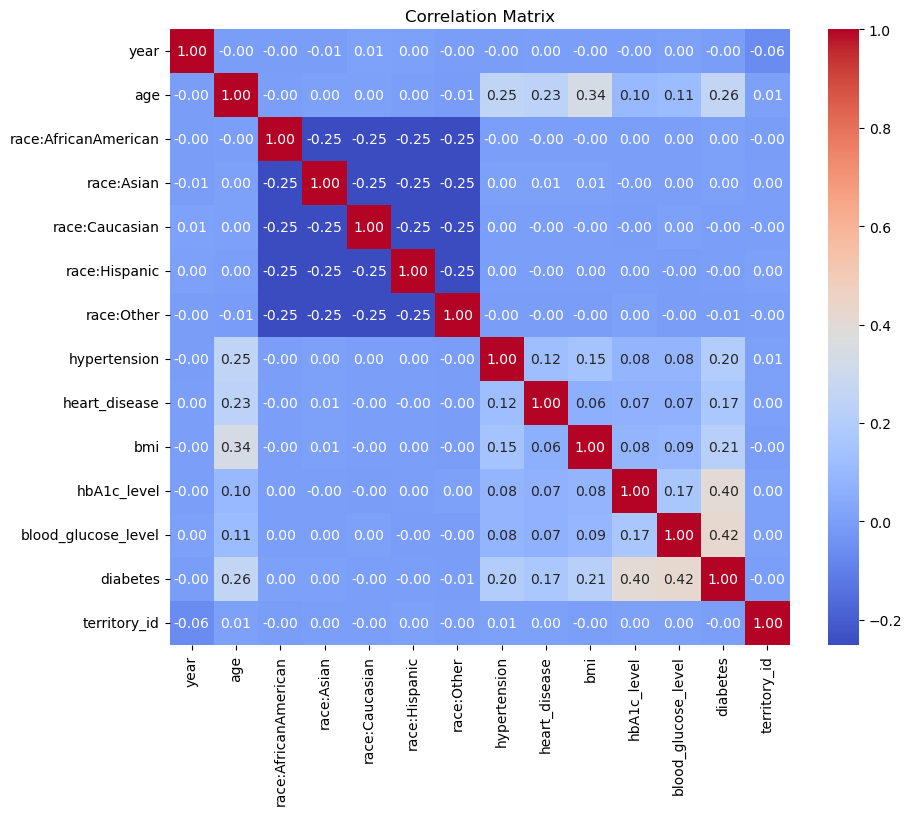

In [7]:
#Visualize correlations:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Clinical Features Predict Diabetes

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\2595073481.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


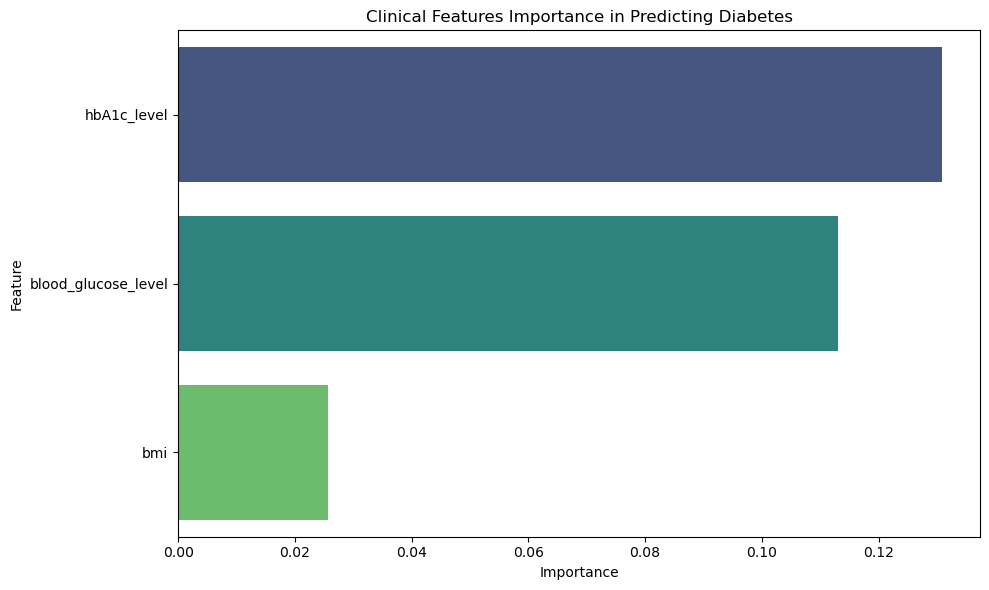

In [75]:
from sklearn.feature_selection import mutual_info_classif

# Features and target
features = df[['bmi', 'hbA1c_level', 'blood_glucose_level']]
target = df['diabetes']

# Mutual Information
mutual_info = mutual_info_classif(features, target)
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': mutual_info})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Visualization: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Clinical Features Importance in Predicting Diabetes")
plt.tight_layout()
plt.savefig('Clinical Features Importance in Predicting Diabetes.png')
plt.show()



#Identify relation between blood glucose levels and diebetes

<Figure size 1000x600 with 0 Axes>

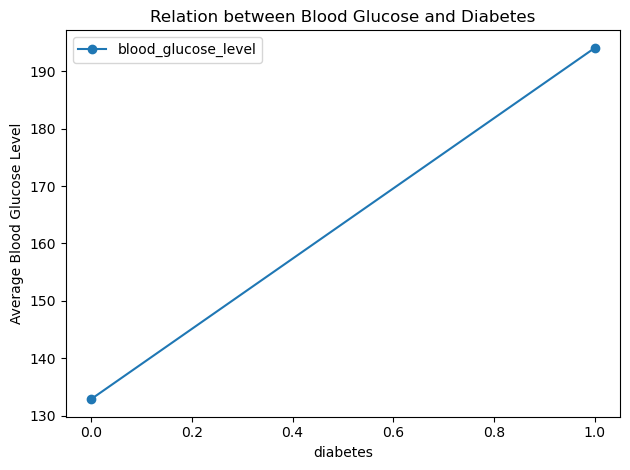

In [84]:
# Threshold analysis
threshold_analysis = df[['blood_glucose_level', 'diabetes']].groupby('diabetes').mean()

# Visualization: Line Chart
plt.figure(figsize=(10, 6))
threshold_analysis.plot(kind='line', marker='o')
plt.title("Relation between Blood Glucose and Diabetes")
plt.ylabel("Average Blood Glucose Level")
plt.tight_layout()
plt.savefig('relation_blood_glucose_diabetes.png')
plt.show()


<Figure size 640x480 with 0 Axes>

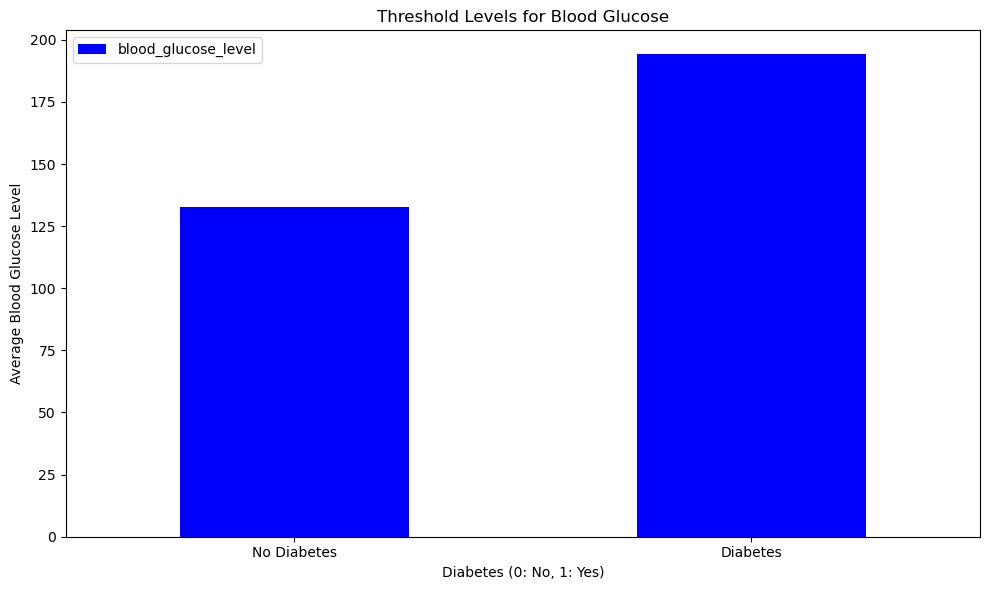

In [77]:

plt.savefig('relation_blood_glucose_diabetes.png')# Visualization: Bar Chart
threshold_analysis.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title("Threshold Levels for Blood Glucose")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Average Blood Glucose Level")
plt.xticks(ticks=[0, 1], labels=["No Diabetes", "Diabetes"], rotation=0)
plt.tight_layout()
plt.savefig('relation_blood_glucose_diabetes2.png')
plt.show()


#Identify correlation of hypertension and heart disease

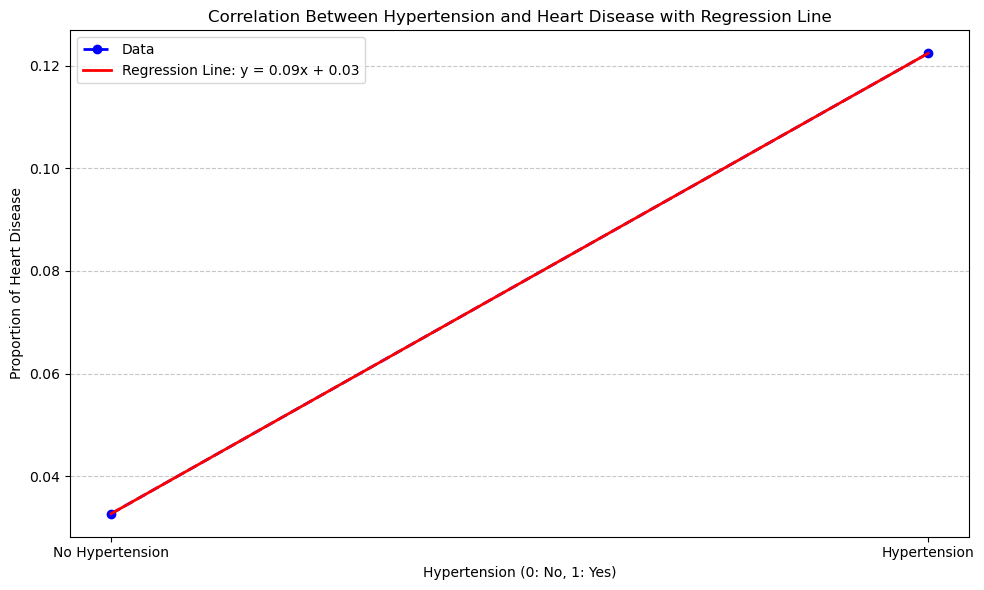

Regression Formula: y = 0.09x + 0.03
Pearson Correlation Coefficient: r = 1.00
P-value: 1.00e+00


In [78]:
from scipy.stats import pearsonr

# Group data by hypertension and calculate the mean proportion of heart disease
hypertension_heart = df.groupby('hypertension')['heart_disease'].mean()

# Perform linear regression
x = np.array(hypertension_heart.index)  # Hypertension (0 or 1)
y = np.array(hypertension_heart.values)  # Proportion of Heart Disease
slope, intercept = np.polyfit(x, y, 1)  # Linear regression

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(x, y)

# Generate regression line
regression_line = slope * x + intercept

# Visualization: Line Chart with Regression Line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='--', color='blue', label='Data', linewidth=2)
plt.plot(x, regression_line, color='red', linestyle='-', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}', linewidth=2)

# Add labels, title, legend, and grid
plt.title("Correlation Between Hypertension and Heart Disease with Regression Line")
plt.xlabel("Hypertension (0: No, 1: Yes)")
plt.ylabel("Proportion of Heart Disease")
plt.xticks(ticks=[0, 1], labels=["No Hypertension", "Hypertension"])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Correlation Between Hypertension and Heart Disease.png')
plt.show()

# Print the regression formula and correlation coefficient
print(f"Regression Formula: y = {slope:.2f}x + {intercept:.2f}")
print(f"Pearson Correlation Coefficient: r = {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2e}")


#Identify correlation of BMI and heart disease

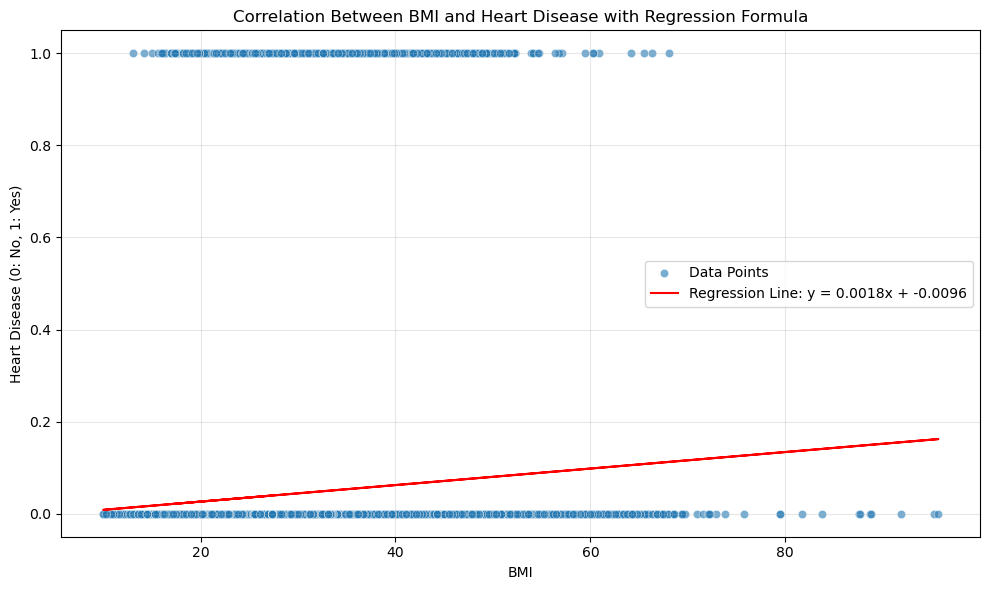

Regression Formula: y = 0.0018x + -0.0096
Pearson Correlation Coefficient: r = 0.0612
P-value: 1.4080e-83


In [79]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Perform linear regression
x = df['bmi']
y = df['heart_disease']
slope, intercept = np.polyfit(x, y, 1)  # Linear regression
regression_line = slope * x + intercept  # Regression line formula

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.6, label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line: y = {slope:.4f}x + {intercept:.4f}')

# Add labels, title, legend, and grid
plt.title("Correlation Between BMI and Heart Disease with Regression Formula")
plt.xlabel("BMI")
plt.ylabel("Heart Disease (0: No, 1: Yes)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Correlation Between BMI and Heart Disease.png')
plt.show()

# Print the regression formula
print(f"Regression Formula: y = {slope:.4f}x + {intercept:.4f}")


correlation_coefficient, p_value = pearsonr(df['bmi'], df['heart_disease'])
print(f"Pearson Correlation Coefficient: r = {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")


#Identify correlation of BMI and diebetes

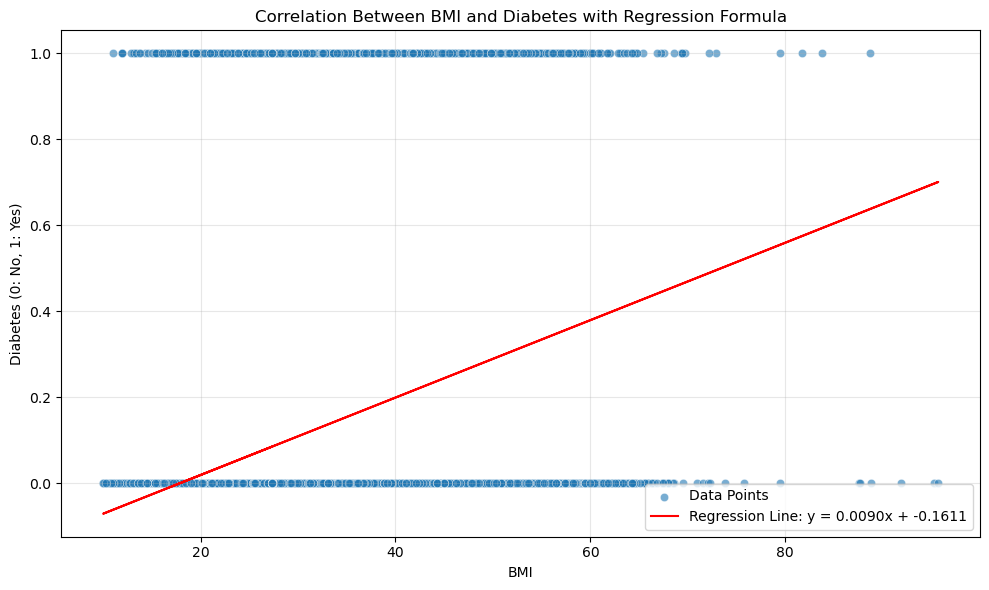

Regression Formula: y = 0.0090x + -0.1611
Pearson Correlation Coefficient: r = 0.2144
P-value: 0.0000e+00


In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Perform linear regression
x = df['bmi']
y = df['diabetes']
slope, intercept = np.polyfit(x, y, 1)  # Linear regression
regression_line = slope * x + intercept  # Regression line formula

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.6, label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line: y = {slope:.4f}x + {intercept:.4f}')

# Add labels, title, legend, and grid
plt.title("Correlation Between BMI and Diabetes with Regression Formula")
plt.xlabel("BMI")
plt.ylabel("Diabetes (0: No, 1: Yes)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Correlation Between BMI and Diabetes.png')
plt.show()

# Print the regression formula
print(f"Regression Formula: y = {slope:.4f}x + {intercept:.4f}")
correlation_coefficient, p_value = pearsonr(df['bmi'], df['diabetes'])
print(f"Pearson Correlation Coefficient: r = {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")



#Heart Disease Prevalence Across Age Groups

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\3569611418.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_heart_disease = df.groupby('age_group')['heart_disease'].mean()


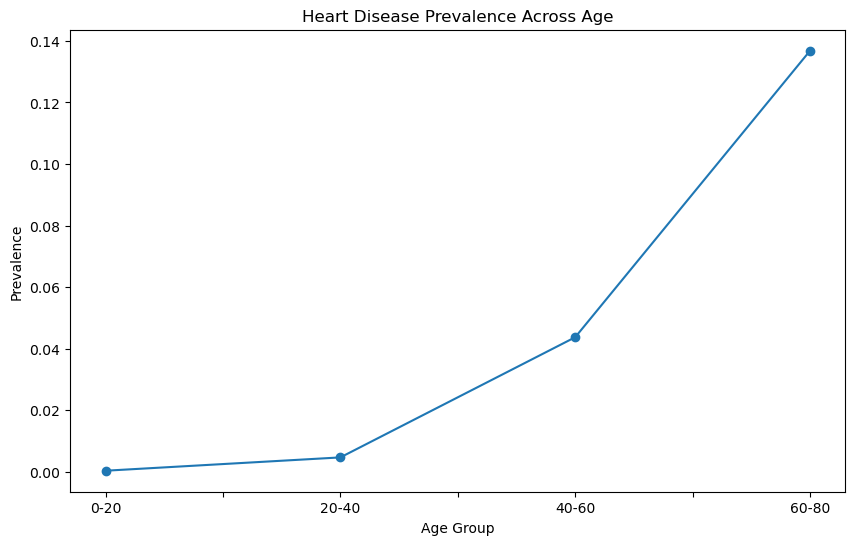

In [81]:
#Prevalence of heart disease across age groups
age_group_heart_disease = df.groupby('age_group')['heart_disease'].mean()

plt.figure(figsize=(10, 6))
age_group_heart_disease.plot(kind='line', marker='o')
plt.title("Heart Disease Prevalence Across Age")
plt.xlabel("Age Group")
plt.ylabel("Prevalence")
plt.savefig('Heart Disease Prevalence Across Age.png')
plt.show()


#Diebetes Disease Prevalence Across Age Groups

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\1087045190.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diabetes = df.groupby('age_group')['diabetes'].mean()


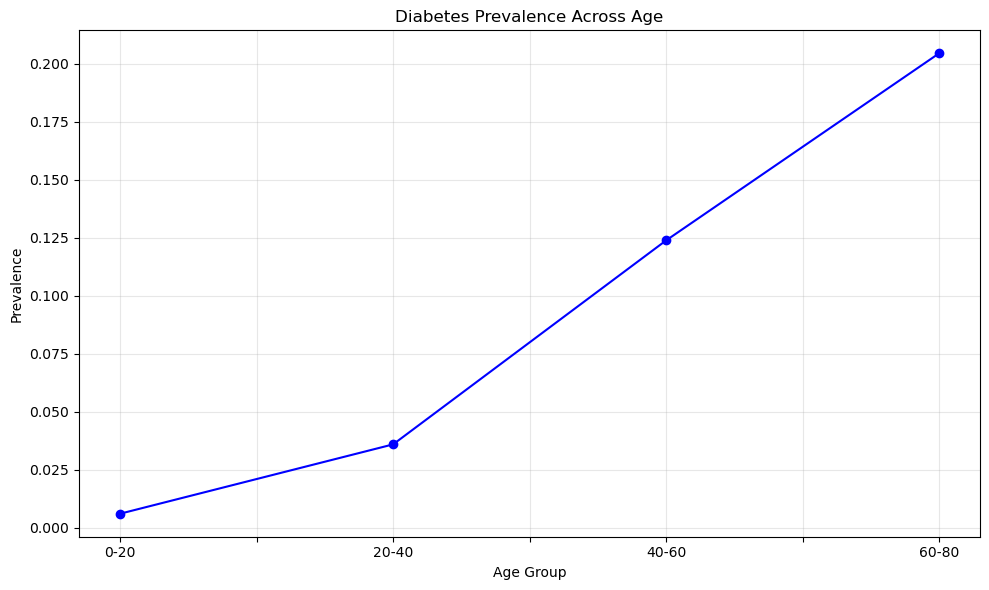

In [82]:
# Prevalence of diabetes across age groups
age_group_diabetes = df.groupby('age_group')['diabetes'].mean()

# Visualization: Line Chart
plt.figure(figsize=(10, 6))
age_group_diabetes.plot(kind='line', marker='o', color='blue')
plt.title("Diabetes Prevalence Across Age")
plt.xlabel("Age Group")
plt.ylabel("Prevalence")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Diabetes Prevalence Across Age')
plt.show()


#Effect of Smoking on Diabetes and Heart Disease

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\951557263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoker_status'] = filtered_df['smoking_history'].apply(


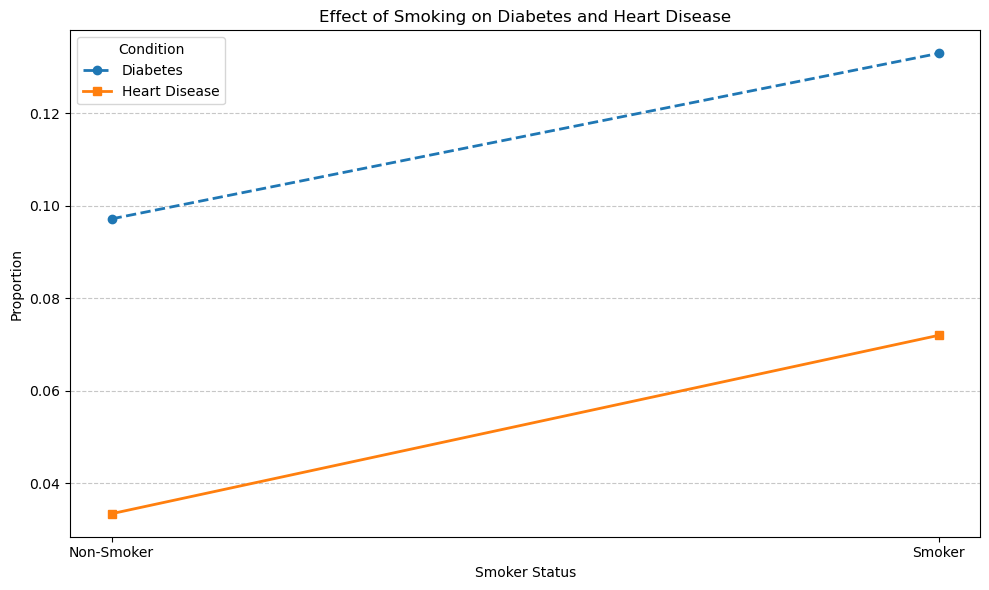

In [83]:
import matplotlib.pyplot as plt

# Create a new column categorizing into 'Smoker' and 'Non-Smoker'
filtered_df['smoker_status'] = filtered_df['smoking_history'].apply(
    lambda x: 'Smoker' if x in ['former', 'current', 'ever'] else 'Non-Smoker'
)

# Group data by smoker status and calculate proportions of diabetes and heart disease
smoker_analysis = filtered_df.groupby('smoker_status')[['diabetes', 'heart_disease']].mean()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(smoker_analysis.index, smoker_analysis['diabetes'], marker='o', label='Diabetes', linestyle='--', linewidth=2)
plt.plot(smoker_analysis.index, smoker_analysis['heart_disease'], marker='s', label='Heart Disease', linestyle='-', linewidth=2)

# Add labels and title
plt.title("Effect of Smoking on Diabetes and Heart Disease")
plt.xlabel("Smoker Status")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=smoker_analysis.index)
plt.legend(title="Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Effect of Smoking on Diabetes and Heart Disease')
plt.show()


Age Group Analysis: How do clinical features like HbA1c levels, BMI, and blood glucose levels vary across age groups (e.g., 20-30, 30-40)?


C:\Users\nedaj\AppData\Local\Temp\ipykernel_18736\1037007765.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df.groupby('age_group')[['hbA1c_level', 'bmi', 'blood_glucose_level']].mean()


Age Group Analysis:
            hbA1c_level        bmi  blood_glucose_level
age_group                                             
20-30         5.395480  27.242447           133.969448
30-40         5.462427  28.860259           134.302559
40-50         5.490858  29.265193           136.883498
50-60         5.603135  29.573536           140.621342
60-70         5.693624  29.486856           145.354474
70-80         5.722736  28.406192           145.938194


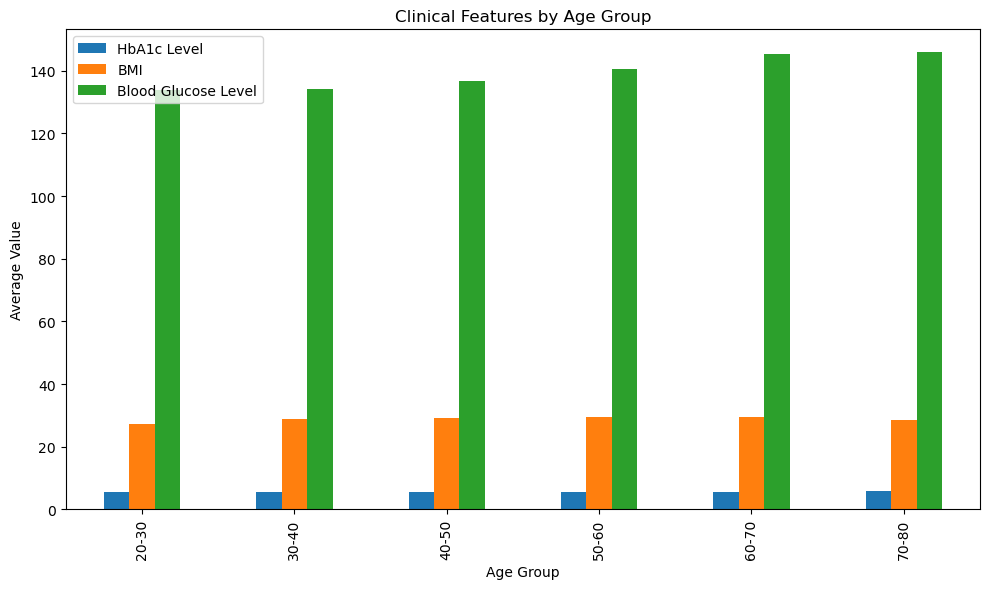

In [ ]:
#Age Group Analysis

age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate averages for clinical features per age group
age_group_analysis = df.groupby('age_group')[['hbA1c_level', 'bmi', 'blood_glucose_level']].mean()
print("Age Group Analysis:\n", age_group_analysis)

# Visualization: Bar Chart for Clinical Features Across Age Groups
age_group_analysis.plot(kind='bar', figsize=(10, 6))
plt.title("Clinical Features by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Value")
plt.legend(["HbA1c Level", "BMI", "Blood Glucose Level"])
plt.tight_layout()
plt.show()

Histograms: Distribution of HbA1c levels among patients with and without heart disease; BMI distribution segmented by smoking history.


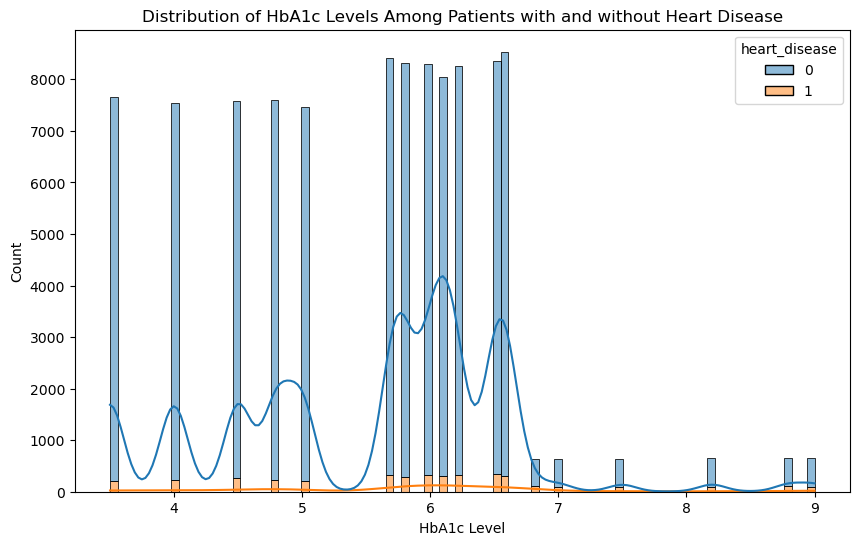

In [20]:
#Distribution of HbA1c levels among patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hbA1c_level', hue='heart_disease', kde=True, multiple='stack')
plt.title("Distribution of HbA1c Levels Among Patients with and without Heart Disease")
plt.xlabel("HbA1c Level")
plt.ylabel("Count")
plt.show()

Box Plots: Compare HbA1c levels and blood glucose levels across genders or racial groups; BMI comparisons between smokers and non-smokers.


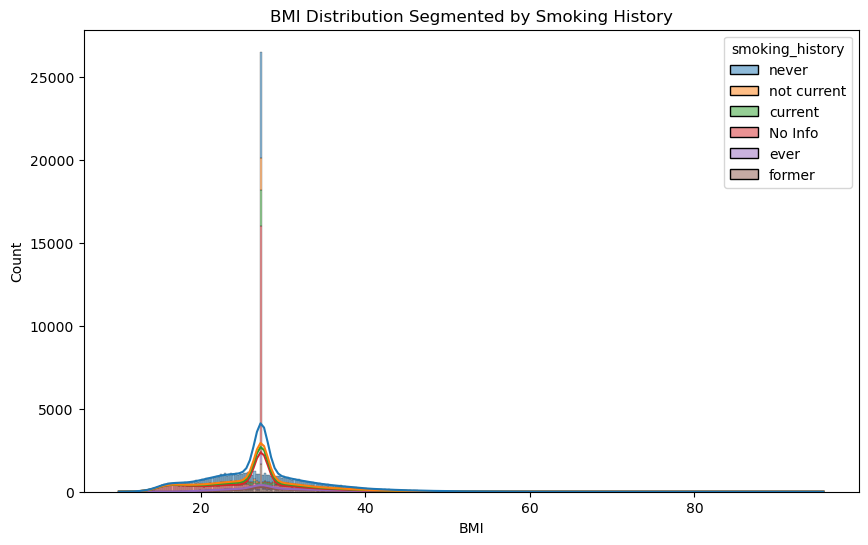

In [21]:
# BMI distribution segmented by smoking history
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='smoking_history', kde=True, multiple='stack')
plt.title("BMI Distribution Segmented by Smoking History")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

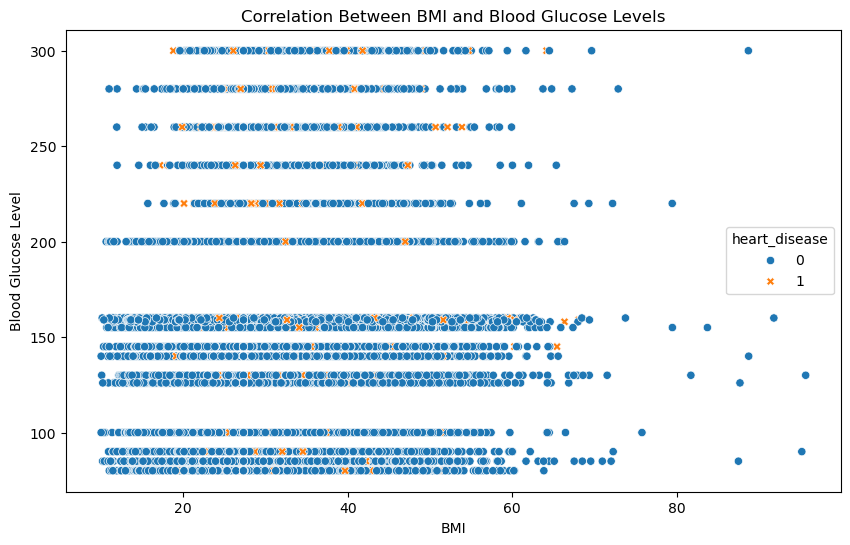

In [22]:
#Correlate BMI and blood glucose levels, color-coded by heart disease status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level', hue='heart_disease', style='heart_disease')
plt.title("Correlation Between BMI and Blood Glucose Levels")
plt.xlabel("BMI")
plt.ylabel("Blood Glucose Level")
plt.show()

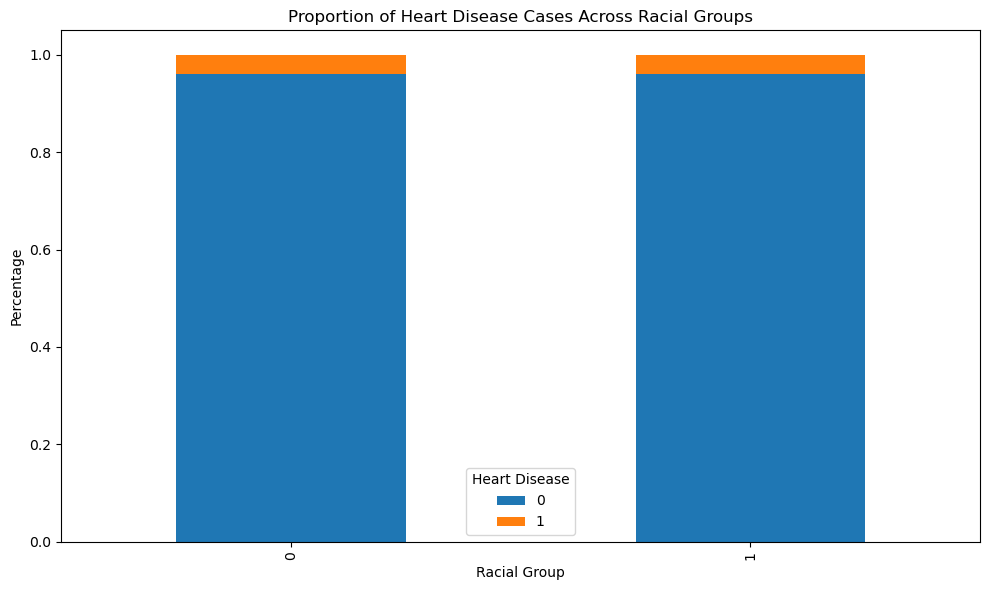

In [24]:
#Proportion of heart disease cases across racial groups
heart_disease_race = df.groupby(['race:Caucasian', 'heart_disease']).size().unstack()
heart_disease_race_percentage = heart_disease_race.div(heart_disease_race.sum(axis=1), axis=0)

heart_disease_race_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Proportion of Heart Disease Cases Across Racial Groups")
plt.xlabel("Racial Group")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\2123755505.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_clinical = df.groupby('age_group')[['bmi', 'hbA1c_level', 'blood_glucose_level']].mean()


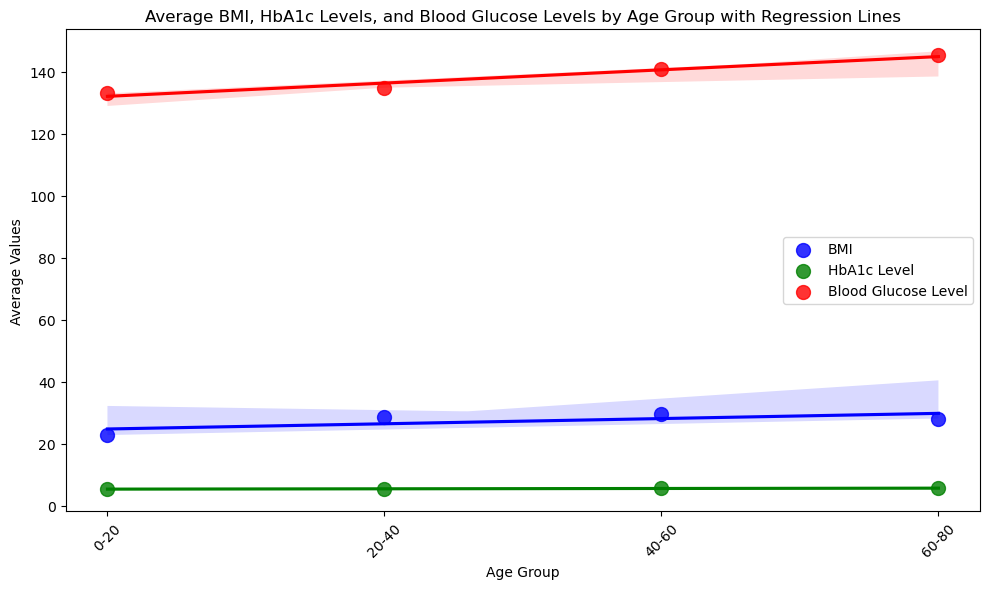

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average BMI, HbA1c levels, and blood glucose levels for each age group
age_group_clinical = df.groupby('age_group')[['bmi', 'hbA1c_level', 'blood_glucose_level']].mean()

# Convert the index to a categorical column for regression plotting
age_group_clinical.reset_index(inplace=True)

# Scatter plot with regression lines for BMI
plt.figure(figsize=(10, 6))
sns.regplot(
    x=age_group_clinical.index, 
    y=age_group_clinical['bmi'], 
    scatter_kws={'s': 100, 'color': 'blue'}, 
    line_kws={'color': 'blue'}, 
    label='BMI'
)

# Scatter plot with regression lines for HbA1c Level
sns.regplot(
    x=age_group_clinical.index, 
    y=age_group_clinical['hbA1c_level'], 
    scatter_kws={'s': 100, 'color': 'green'}, 
    line_kws={'color': 'green'}, 
    label='HbA1c Level'
)

# Scatter plot with regression lines for Blood Glucose Level
sns.regplot(
    x=age_group_clinical.index, 
    y=age_group_clinical['blood_glucose_level'], 
    scatter_kws={'s': 100, 'color': 'red'}, 
    line_kws={'color': 'red'}, 
    label='Blood Glucose Level'
)

# Adjust x-axis labels to show age groups
plt.xticks(ticks=age_group_clinical.index, labels=age_group_clinical['age_group'], rotation=45)

# Add labels, title, and legend
plt.title("Average BMI, HbA1c Levels, and Blood Glucose Levels by Age Group with Regression Lines")
plt.xlabel("Age Group")
plt.ylabel("Average Values")
plt.legend()
plt.tight_layout()
plt.show()

#Scatter Plot with Regression Line for HbA1c vs. BMI

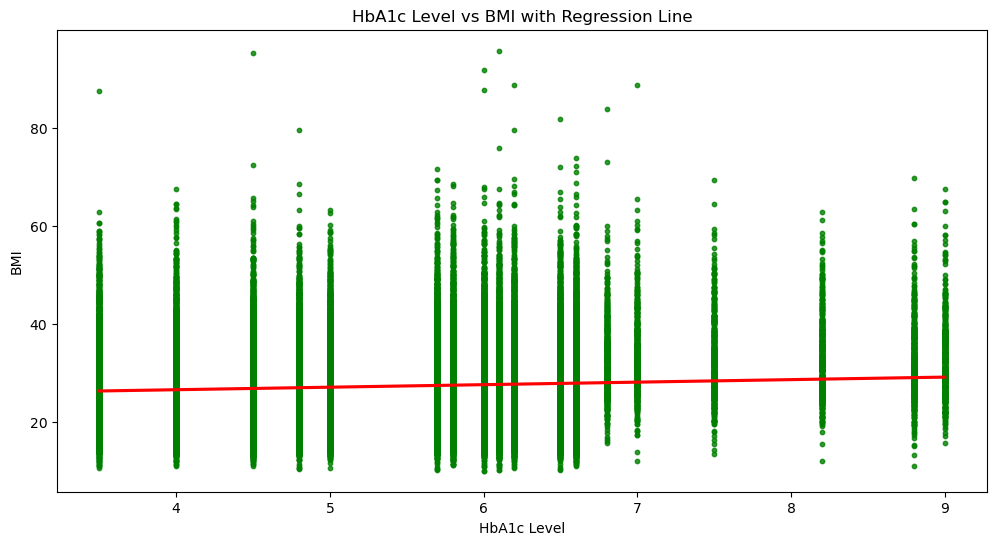

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(
    x='hbA1c_level', 
    y='bmi', 
    data=df, 
    color='green', 
    scatter_kws={'s': 10}, 
    line_kws={"color": "red"}
)
plt.title('HbA1c Level vs BMI with Regression Line')
plt.xlabel('HbA1c Level')
plt.ylabel('BMI')
plt.show()

#Scatter Plot with Regression Line for HbA1c vs. Blood Glucose Level

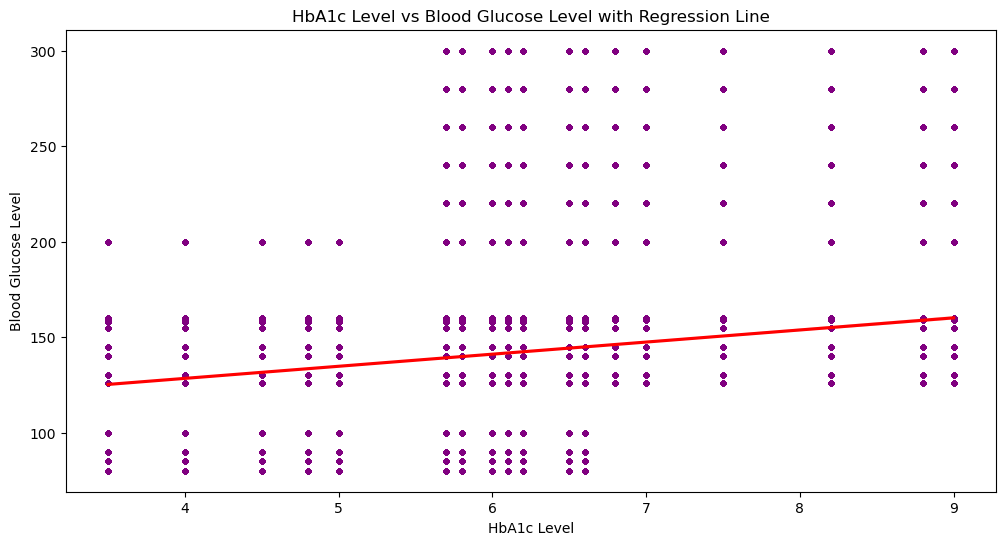

In [31]:
plt.figure(figsize=(12, 6))
sns.regplot(
    x='hbA1c_level', 
    y='blood_glucose_level', 
    data=df, 
    color='purple', 
    scatter_kws={'s': 10}, 
    line_kws={"color": "red"}
)
plt.title('HbA1c Level vs Blood Glucose Level with Regression Line')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.show()

#Bar Chart for Diabetes Cases by Race

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\800944436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette='Blues_d')


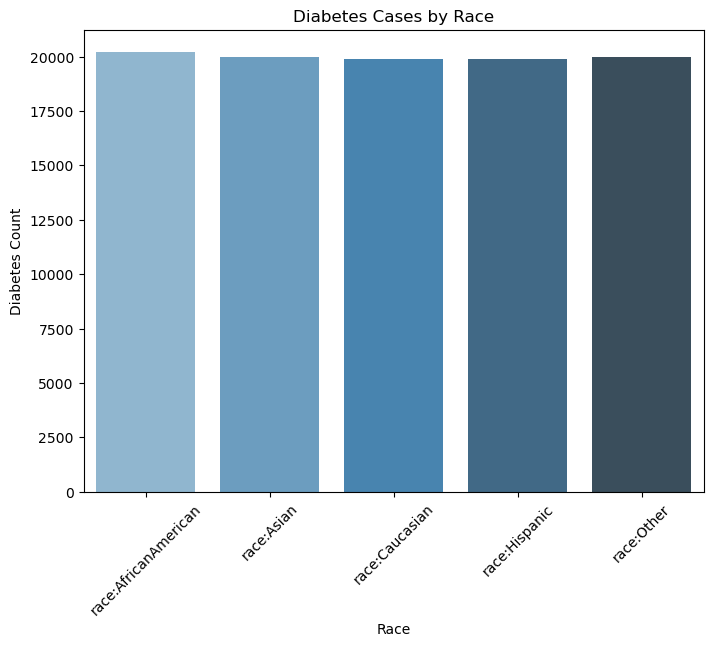

In [19]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
race_counts = df[race_columns].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='Blues_d')
plt.title('Diabetes Cases by Race')
plt.xlabel('Race')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=45)
plt.show()

#Bar Chart for Diabetes Cases by Age Group

C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\2621250762.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby('age_group')['diabetes'].sum()
C:\Users\nedaj\AppData\Local\Temp\ipykernel_16712\2621250762.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Oranges_d')


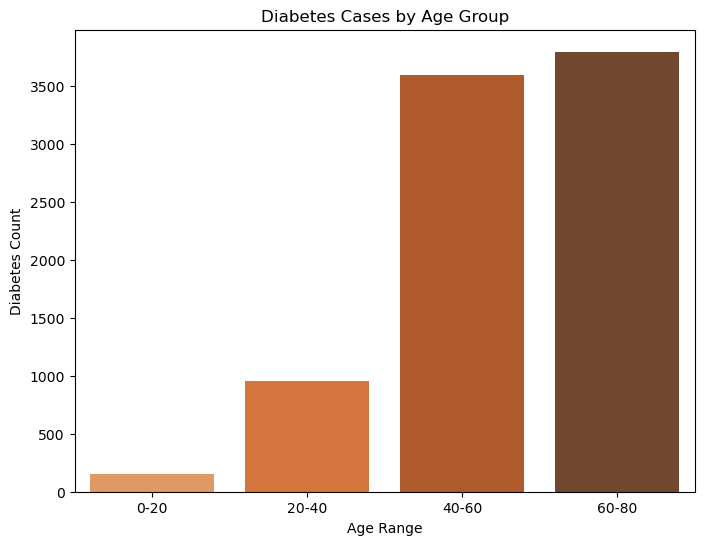

In [29]:
# Create age bins and labels
age_bins = [0, 25, 45, 65, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group data by age group
age_group_counts = df.groupby('age_group')['diabetes'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Oranges_d')
plt.title('Diabetes Cases by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Diabetes Count')
plt.show()

#Pie Chart for Diabetes Cases by Gender

4461 Female diabetes cases
4039 Male diabetes cases


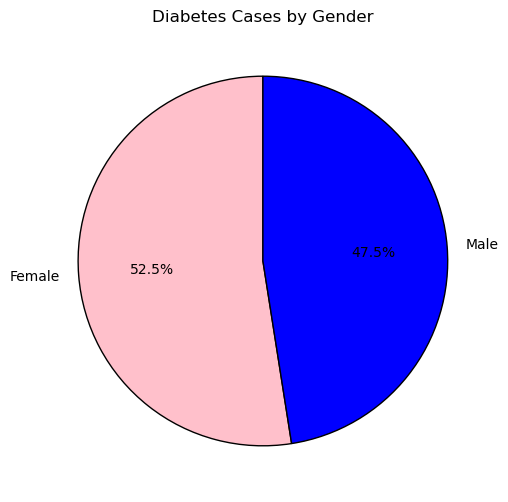

In [28]:
# Count diabetes cases by gender
gender_counts = df[df['diabetes'] == 1]['gender'].value_counts()

# Display counts
for gender, count in gender_counts.items():
    print(f"{count} {gender} diabetes cases")

# Pie chart
plt.figure(figsize=(6, 6))
colors = ['pink', 'blue']  # Female = pink, Male = blue
gender_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    labels=['Female', 'Male'],  
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Diabetes Cases by Gender')
plt.ylabel('')  #y-label removed for cleaner visualization
plt.show()